In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import xgboost as xgb
import pickle
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import GradientBoostingClassifier

#### Loading the Password Dataset

In [6]:
data = pd.read_csv('data/data.csv', error_bad_lines=False)
data = data.dropna().sample(frac=1).reset_index(drop=True) # Remove null values and shuffle the data

d:\Year 3\FYP\Password Analyzer Using Machine Learning\venv\lib\site-packages\IPython\core\interactiveshell.py:3553: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)
b'Skipping line 2810: expected 2 fields, saw 5\nSkipping line 4641: expected 2 fields, saw 5\nSkipping line 7171: expected 2 fields, saw 5\nSkipping line 11220: expected 2 fields, saw 5\nSkipping line 13809: expected 2 fields, saw 5\nSkipping line 14132: expected 2 fields, saw 5\nSkipping line 14293: expected 2 fields, saw 5\nSkipping line 14865: expected 2 fields, saw 5\nSkipping line 17419: expected 2 fields, saw 5\nSkipping line 22801: expected 2 fields, saw 5\nSkipping line 25001: expected 2 fields, saw 5\nSkipping line 26603: expected 2 fields, saw 5\nSkipping line 26742: expected 2 fields, saw 5\nSkipping line 29702: expected 2 fields, saw 5\nSkipping line 32767: expected 2 fields, saw 5\nSkipping line 32878:

#### Separating features (passwords) and target (strength)

In [7]:
X = data['password']
y = data['strength']

#### Plot the distribution of password strength

<AxesSubplot:xlabel='strength', ylabel='count'>

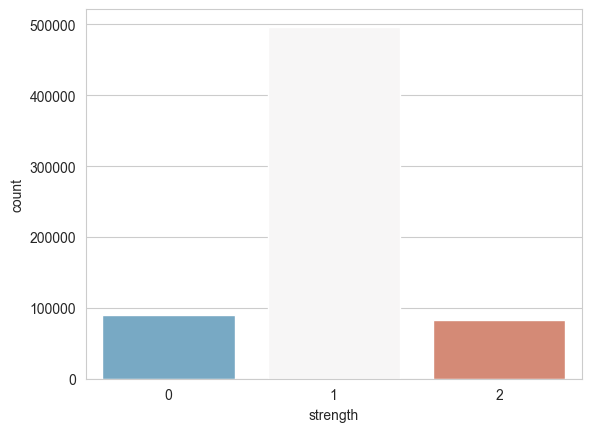

In [8]:
sns.set_style('whitegrid')
sns.countplot(x='strength', data=data, palette='RdBu_r')

#### Convert a given word (string) to a list of individual characters

In [9]:
def word_to_char(word):
    return list(word)

#### Create the TfidfVectorizer and fit_transform the passwords

In [10]:
vectorizer = TfidfVectorizer(tokenizer=word_to_char)
X = vectorizer.fit_transform(X)

#### Split the data into training and testing sets

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [12]:
# Scale the data
scaler = StandardScaler(with_mean=False)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#### Train and evaluate a logistic regression model

In [13]:
log_clf = LogisticRegression(penalty='l2', multi_class='ovr', solver='liblinear')
log_clf.fit(X_train, y_train)
y_pred = log_clf.predict(X_test)
print('Accuracy (Logistic Regression):', metrics.accuracy_score(y_test, y_pred))

Accuracy (Logistic Regression): 0.8112941281882803


#### Train and evaluate a K-Nearest Neighbors model

In [10]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)
y_pred = knn_clf.predict(X_test)
print('Accuracy (K-Nearest Neighbors):', metrics.accuracy_score(y_test, y_pred))

Accuracy (K-Nearest Neighbors): 0.7786721223343886


In [11]:
# Train and evaluate a Support Vector Machine model
svc_clf = SVC()
svc_clf.fit(X_train, y_train)
y_pred = svc_clf.predict(X_test)
print('Accuracy (Support Vector Machine):', metrics.accuracy_score(y_test, y_pred))

Accuracy (Support Vector Machine): 0.8886939250940804


#### Train and evaluate a Naive Bayes model

In [12]:
nb_clf = MultinomialNB()
nb_clf.fit(X_train, y_train)
y_pred = nb_clf.predict(X_test)
print('Accuracy (Naive Bayes):', metrics.accuracy_score(y_test, y_pred))

Accuracy (Naive Bayes): 0.7448031778268921


#### Train and evaluate a Decision Tree model

In [14]:
dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train, y_train)
y_pred = dt_clf.predict(X_test)
print('Accuracy (Decision Tree):', metrics.accuracy_score(y_test, y_pred))

Accuracy (Decision Tree): 0.9271922226868168


#### Train and evaluate a Random Forest model

In [13]:
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)
y_pred = rf_clf.predict(X_test)
print('Accuracy (Random Forest):', metrics.accuracy_score(y_test, y_pred))

Accuracy (Random Forest): 0.9557000776536646


#### Train and evaluate a Gradient Boosting Classifier model

In [14]:
gb_clf = GradientBoostingClassifier()
gb_clf.fit(X_train, y_train)
y_pred = gb_clf.predict(X_test)
print('Accuracy (Gradient Boosting Classifier):', metrics.accuracy_score(y_test, y_pred))

Accuracy (Gradient Boosting Classifier): 0.9127516277402784


#### Train and evaluate an XGBoost classifier

In [15]:
xgb_clf = xgb.XGBClassifier()
xgb_clf.fit(X_train, y_train)
y_pred = xgb_clf.predict(X_test)
print('Accuracy (XGBoost):', metrics.accuracy_score(y_test, y_pred))

Accuracy (XGBoost): 0.9810271190490413


### Saving the vectorizer and XGBoost classifier as picke files

In [16]:
pickle.dump(vectorizer, open("tfidf_password_strength.pickle", "wb"))
pickle.dump(xgb_clf, open("final_model.pickle", "wb"))

#### Load the saved vectorizer and XGBoost classifier

In [17]:
with open("tfidf_password_strength.pickle", 'rb') as file:
    saved_vectorizer = pickle.load(file) # Load the vectorizer from the pickle file

with open("final_model.pickle", 'rb') as file:
    final_model = pickle.load(file) # Load the final model (XGBoost classifier) from the pickle file

#### Defining a function to test the final model

In [18]:
def test_password_strength(password, vectorizer, model):
    X_password = np.array([password]) # Convert the password to a numpy array
    X_predict = vectorizer.transform(X_password) # Transform the password using the loaded vectorizer
    y_pred = model.predict(X_predict) # Predict the password strength using the loaded model
    return y_pred

#### Testing sample passwords

In [19]:
# Print the first password and its predicted strength
password1 = 'abc'
strength1 = test_password_strength(password1, saved_vectorizer, final_model)
print(f'Password: {password1}, Strength: {strength1}')

Password: abc, Strength: [0]


In [20]:
# Print the second password and its predicted strength
password2 = 'abc@123'
strength2 = test_password_strength(password2, saved_vectorizer, final_model)
print(f'Password: {password2}, Strength: {strength2}')

Password: abc@123, Strength: [1]


In [21]:
# Print the third password and its predicted strength
password3 = 'abc@123$##'
strength3 = test_password_strength(password3, saved_vectorizer, final_model)
print(f'Password: {password3}, Strength: {strength3}')

Password: abc@123$##, Strength: [2]
